In [43]:
# Import libraries

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2HDM with $Z_2$ symmetry

In [44]:
dim = 1000 # Number of (pseudo-)random numbers.

# The idea is to generate some (pseudo-)random numbers so as to find which combination is valid, in light of the analysis presented in the Master' Thesis associated with this code.

rho_3 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_4 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_5 = np.random.default_rng().uniform(0,5,dim) # rho_5 is |rho_5|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

gamma = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_5.

In [45]:
def search_minimum_values(rho_3_param,rho_4_param,rho_5_param,dim_parameter,epsilon):

    # This function finds the valid values for the parameters of the 2HDM potential.

    r2 = np.linspace(0,1,200) # r2 is r^2, which takes values from 0 to 1.
    cosine_gamma_plus_beta = np.linspace(-1,1,200) # cosine_gamma_plus_beta is cos(γ+β), whose values vary from -1 to 1.
    x = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    y = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    #
    rho_3_eff_min_valid = []
    rho_3_eff = np.zeros((len(r2),len(cosine_gamma_plus_beta)))
    rho_3_eff_min = np.zeros(dim_parameter)
    #
    for k in range(0,dim_parameter):
        #
        for i in range(0,len(r2)):
            for j in range(0,len(cosine_gamma_plus_beta)):
                rho_3_eff[i,j] = rho_3_param[k]+r2[i]*(rho_4_param[k]+rho_5_param[k]*cosine_gamma_plus_beta[j])
        #
        rho_3_eff_min[k] = np.min(rho_3_eff)
        V = (1/2)*x**2+(1/2)*y**2+rho_3_eff_min[k]*x*y
        #
        if np.min(V) >= -epsilon: ##The minus sign is to include 0.
            rho_3_eff_min_valid.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(rho_3_eff_min[k])])
            
            # It is possible to use the following code in order to work with np.float64:
            # rho_3_eff_min_valid.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],rho_3_eff_min[k]])
    #
    if not rho_3_eff_min_valid == []:
        return rho_3_eff_min_valid # First element: rho_3, Second element: rho_4, Third element: |rho_5|, Fourth element: rho_3_eff_min.
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')

In [46]:
# Results

valid_values = search_minimum_values(rho_3,rho_4,rho_5,dim,10**(-5))
valid_values

[[4.070038254023862,
  -0.39884256313169164,
  0.5674212170981013,
  3.103774473794069],
 [3.912872548593624,
  -2.2831601298588167,
  0.963494531396541,
  0.6662178873382665],
 [4.061827890119304,
  3.161754273023522,
  4.4795987713284475,
  2.7439833918143783],
 [2.1649419698127828,
  3.1567524968308884,
  0.6650804475244049,
  2.1649419698127828],
 [4.246511932636045, 4.652077609250814, 2.5751550231385627, 4.246511932636045],
 [0.8129575058262262,
  2.922713482529163,
  0.7147847681743619,
  0.8129575058262262],
 [0.9927875922259783,
  4.565750110006178,
  2.5751591718615052,
  0.9927875922259783],
 [4.095797407351283, 2.2300534442447173, 2.4239418559027297, 3.90190899569327],
 [4.052446955698315, 2.8820362951416945, 4.10402041668204, 2.830462834157969],
 [2.5011048787715193,
  3.9779503621413745,
  0.09624396244975131,
  2.5011048787715193],
 [-0.1020820160392768,
  4.324449684303767,
  2.5883198718852043,
  -0.1020820160392768],
 [4.808117114219158,
  1.8147623211218011,
  4.94633

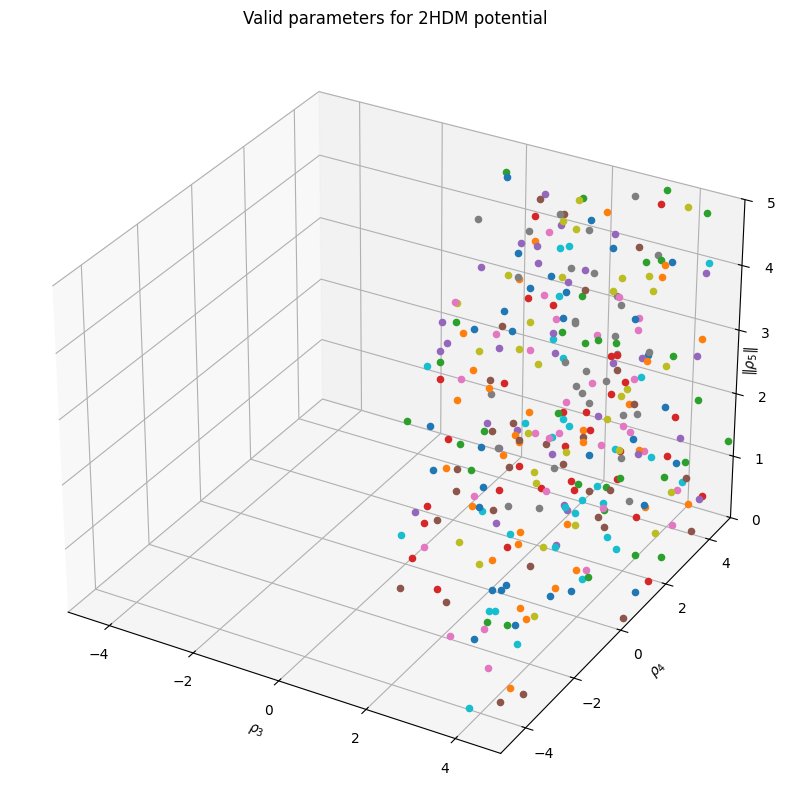

In [47]:
# Plot of the results

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(valid_values)-1,len(valid_values)):
    #
    ax.scatter(valid_values[int(point)][0],valid_values[int(point)][1],valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential')

plt.show()

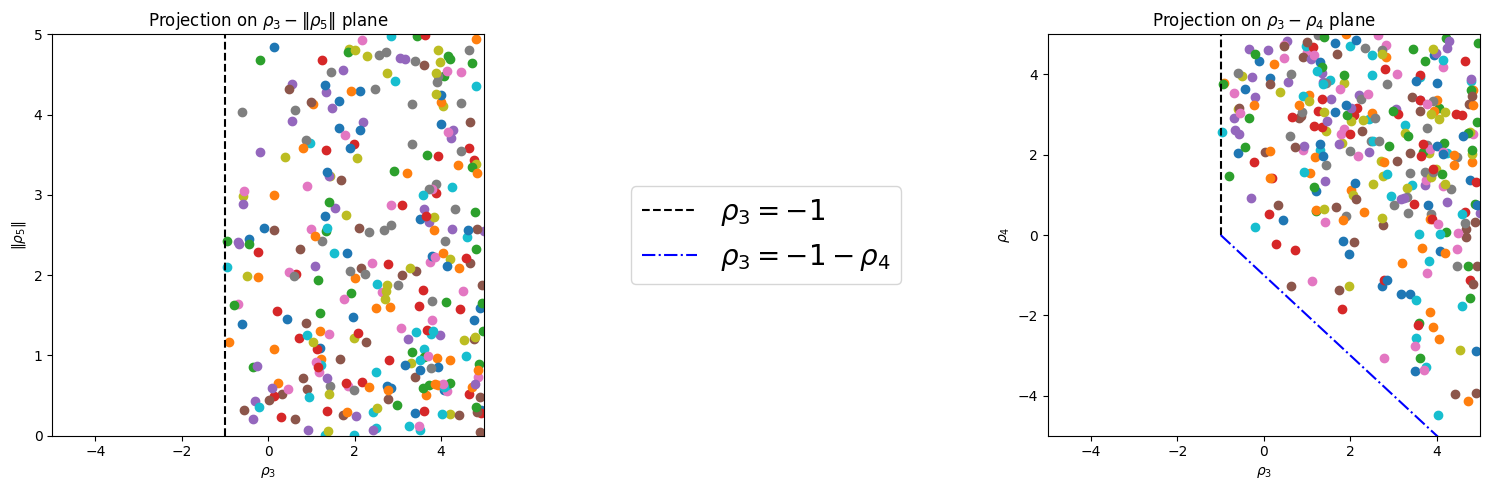

In [48]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{5}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][1])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [49]:
# Check!

search_minimum_values([0],[0],[0],1,10**(-5))

# As rho_3=rho_4=rho_5=0, then rho_3_eff_min=0, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[0.0, 0.0, 0.0, 0.0]]

In [50]:
# Check!

search_minimum_values([-2],[0],[0],1,10**(-5))

# As rho_3=-2 and rho_4=rho_5=0, then rho_3_eff_min=-2, which is NOT greater than -1, so this values are NOT valid (Error message arises).

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [51]:
# Check!

search_minimum_values([1],[0],[0],1,10**(-5))

# As rho_3=1 and rho_4=rho_5=0, then rho_3_eff_min=1, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[1.0, 0.0, 0.0, 1.0]]

# 2HDM without $Z_2$ symmetry

In [52]:
dim = 100

# Same parameters as above.

rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)

rho_6 = np.random.default_rng().uniform(0,5,dim) # rho_6 is |rho_6|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

alpha = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_6.

rho_7 = np.random.default_rng().uniform(0,5,dim) # rho_7 is |rho_7|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 #Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

xi = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_7.

In [53]:
def search_minimum_values_for_Z2_violating_2HDM(rho_3_param,rho_4_param,rho_5_param,gamma_param,rho_6_param,alpha_param,rho_7_param,xi_param,dim_param,epsilon_2):

    # The idea here is similar to the previous one but with much more parameters.

    r = np.linspace(0,1,50)
    beta = np.linspace(0,2*np.pi,50)
    chi = np.linspace(0,np.pi/2,50)
    #
    minimum_for_all = []
    V = np.zeros((len(r),len(beta),len(chi)))
    #
    for k in range(0,dim_param):
        #
        for i in range(0,len(r)):
            for j in range(0,len(beta)):
                for w in range(0,len(chi)):
                    V[i,j,w] = 2+((rho_3_param[k]+r[i]**2*(rho_4_param[k]+np.abs(rho_5_param[k])*np.cos(gamma_param[k]+beta[j])))-1)*(np.sin(2*chi[w]))**2+np.sin(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_param[k]+(1/2)*beta[j])+np.abs(rho_7_param[k])*r[i]*np.cos(xi_param[k]+(1/2)*beta[j])+np.cos(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_param[k]+(1/2)*beta[j])-np.abs(rho_7_param[k])*r[i]*np.cos(xi_param[k]+(1/2)*beta[j])))
        #
        if np.min(V) >= -epsilon_2:
            minimum_for_all.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(gamma_param[k]),float(rho_6_param[k]),float(alpha_param[k]),float(rho_7_param[k]),float(xi_param[k]),float(np.min(V))])
            
             # It is possible to use the following code in order to work with np.float64:
             # minimum_for_all.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],gamma_param[k],rho_6_param[k],alpha_param[k],rho_7_param[k],xi_param[k],np.min(V)])
    #
    if not minimum_for_all == []:
        return minimum_for_all
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')
    

In [54]:
# Results

search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))

[[1.2547346790607437,
  0.9986638879457335,
  3.0751499799208517,
  0.29705702897911146,
  3.288596747918513,
  4.755703336781355,
  1.2058776176220676,
  3.4206532485903867,
  1.6676757305637122],
 [3.3103679441292897,
  -2.723781582737229,
  0.8767079591603694,
  5.681117758647123,
  0.5330138333086659,
  5.62732876703111,
  0.9007061346328793,
  3.7447238783786116,
  1.3456324725967388],
 [2.3816434173868783,
  3.6373288211496746,
  3.24752713899092,
  5.454257128446322,
  1.6705329091608478,
  1.0031185345790763,
  3.554824396743026,
  4.274304127468195,
  1.1188045102181945],
 [1.7966625314863975,
  3.1680451155445972,
  3.387723869340929,
  0.3788254892759056,
  3.963907072917834,
  4.9695639405591265,
  0.8966705790554952,
  2.079776337960136,
  1.5665576844281657],
 [4.944444360950248,
  2.937663477431011,
  2.4303537660273022,
  3.375610867500104,
  1.5781714830936966,
  2.7452782231971034,
  0.3178742287386932,
  5.417932633909525,
  1.5396233235446892],
 [3.922440943626736,


In [55]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([0],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([0],[0],[0],1,10**(-5))

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0010273036248318]]

In [56]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([-2],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([-2],[0],[0],1,10**(-5))

# NOTE: This code might consider rho_3=-1 as a valid value because it is a limit case

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [57]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([1],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([1],[0],[0],1,10**(-5))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]]

In [58]:
# Check!

# Reproduce Z_2-conserving 2HDM results

dim = 1000
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
#
new_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,np.linspace(0,0,dim),np.linspace(0,0,dim),np.linspace(0,0,dim),np.linspace(0,0,dim),np.linspace(0,0,dim),dim,10**(-5))
new_valid_values

[[-0.9397812395073588,
  1.1402045416410012,
  0.5275413164228115,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.06221150479136783],
 [4.8130985119249505,
  4.829703296164631,
  4.8433042075008315,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 [-0.7130248859281814,
  4.529133481416384,
  1.5262315699367068,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.28873491074655977],
 [-0.5441095666268625,
  4.703364022849112,
  4.231372033749582,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.45747670272807084],
 [3.2018748111268227,
  1.6459105153789917,
  0.9289697825781118,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 [1.2850789949773178,
  1.6251026584993422,
  1.9511174739198878,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.9631108949460254],
 [0.9554109707353433,
  2.659090507437993,
  2.779765857262895,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.8406108574218205],
 [-0.7380760106115147,
  3.8242563008656365,
  3.9912073918495383,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.10512187903036585],
 [3.7397223104776227,
  3.2716676092

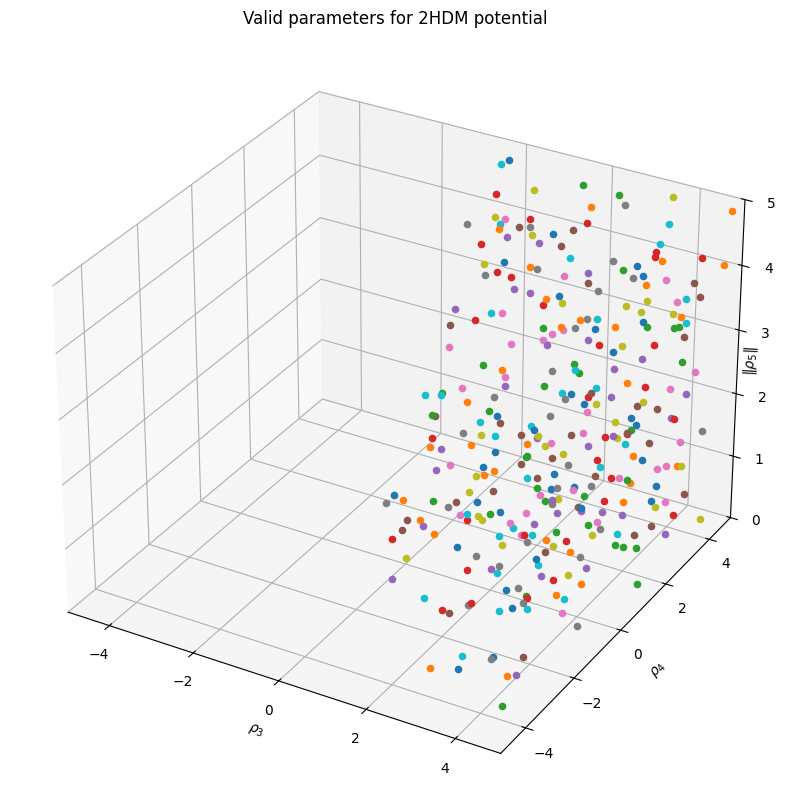

In [59]:
# Plot of the results

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(new_valid_values)-1,len(new_valid_values)):
    #
    ax.scatter(new_valid_values[int(point)][0],new_valid_values[int(point)][1],new_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential')

plt.show()

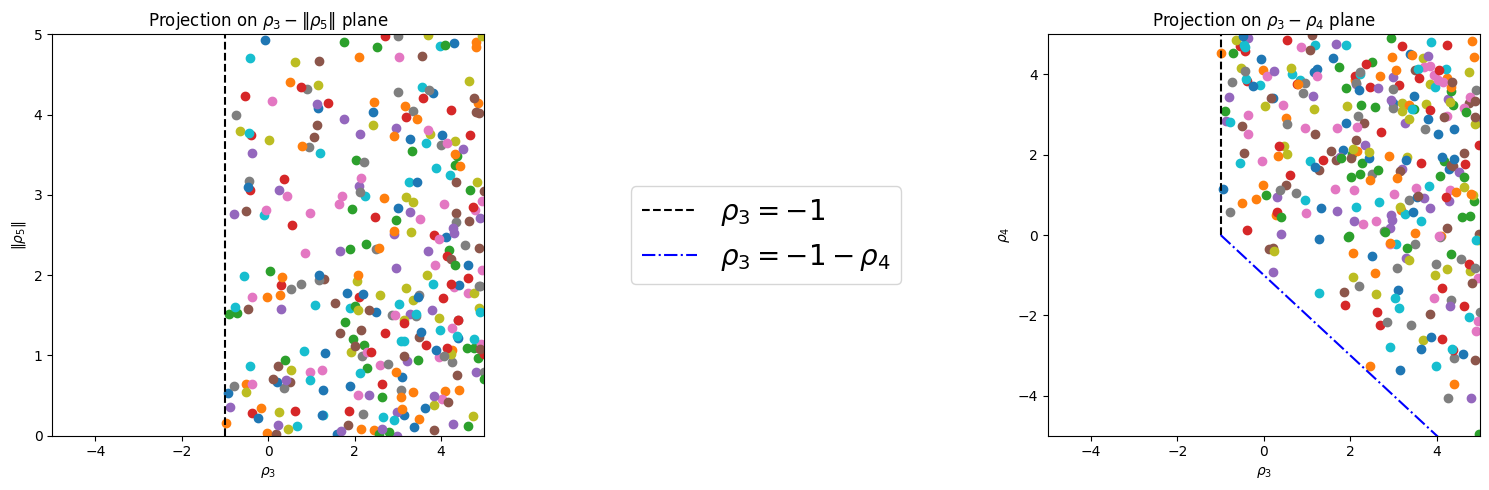

In [60]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

for point in np.linspace(0, len(new_valid_values)-1, len(new_valid_values)):
    ax.scatter(new_valid_values[int(point)][0], new_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{5}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

for point in np.linspace(0, len(new_valid_values)-1, len(new_valid_values)):
    ax.scatter(new_valid_values[int(point)][0], new_valid_values[int(point)][1])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [61]:
# Explore Z_2-violating 2HDM results

dim = 1000
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_7 = np.random.default_rng().uniform(0,5,dim) 
xi = np.random.default_rng().uniform(0,2*np.pi,dim)
#
Z2_violating_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
Z2_violating_valid_values

[[4.359048936493194,
  2.300578053617449,
  3.8703888172079997,
  2.1313370551490376,
  0.004325701482701949,
  3.875294527204975,
  0.5517676433203017,
  1.452432726033316,
  1.9489001401773531],
 [4.784545307686178,
  1.9094325566089871,
  0.3736738204128759,
  0.9645221929133346,
  2.8515364180945983,
  1.123720584144072,
  2.3253237507544804,
  1.891732377983025,
  0.6583922441984487],
 [-0.8111853284622361,
  -1.0862050762956486,
  2.988024587399107,
  0.3437890457196467,
  2.1272752654811233,
  5.610942294363414,
  3.132424971473942,
  4.3055730510274435,
  0.10896502584396739],
 [3.521485549735729,
  3.8876090939266543,
  1.0541947767174213,
  1.013265499433964,
  1.5500983274932696,
  3.5940391111514383,
  0.6449553126477209,
  0.9558471421304361,
  1.7278073865011296],
 [4.500471945798809,
  -1.7845132760342244,
  0.2649122830788009,
  5.8211482986153396,
  3.3178370768822365,
  5.258838057270767,
  0.4065538353104853,
  5.0050735423248005,
  0.8270988371385537],
 [2.525012307

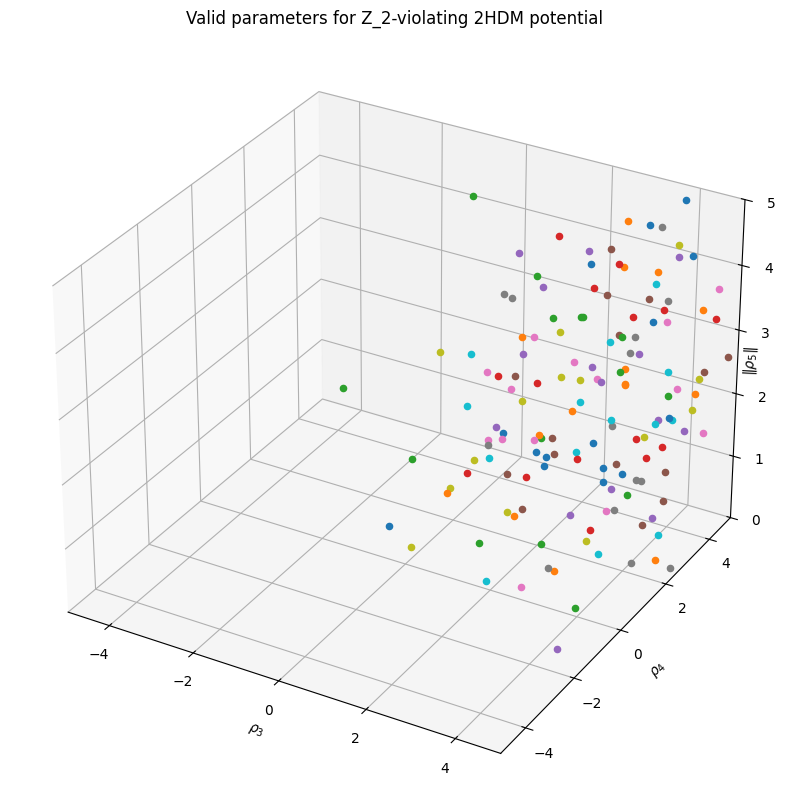

In [62]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(Z2_violating_valid_values)-1,len(Z2_violating_valid_values)):
    #
    ax.scatter(Z2_violating_valid_values[int(point)][0],Z2_violating_valid_values[int(point)][1],Z2_violating_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for Z_2-violating 2HDM potential')

plt.show()

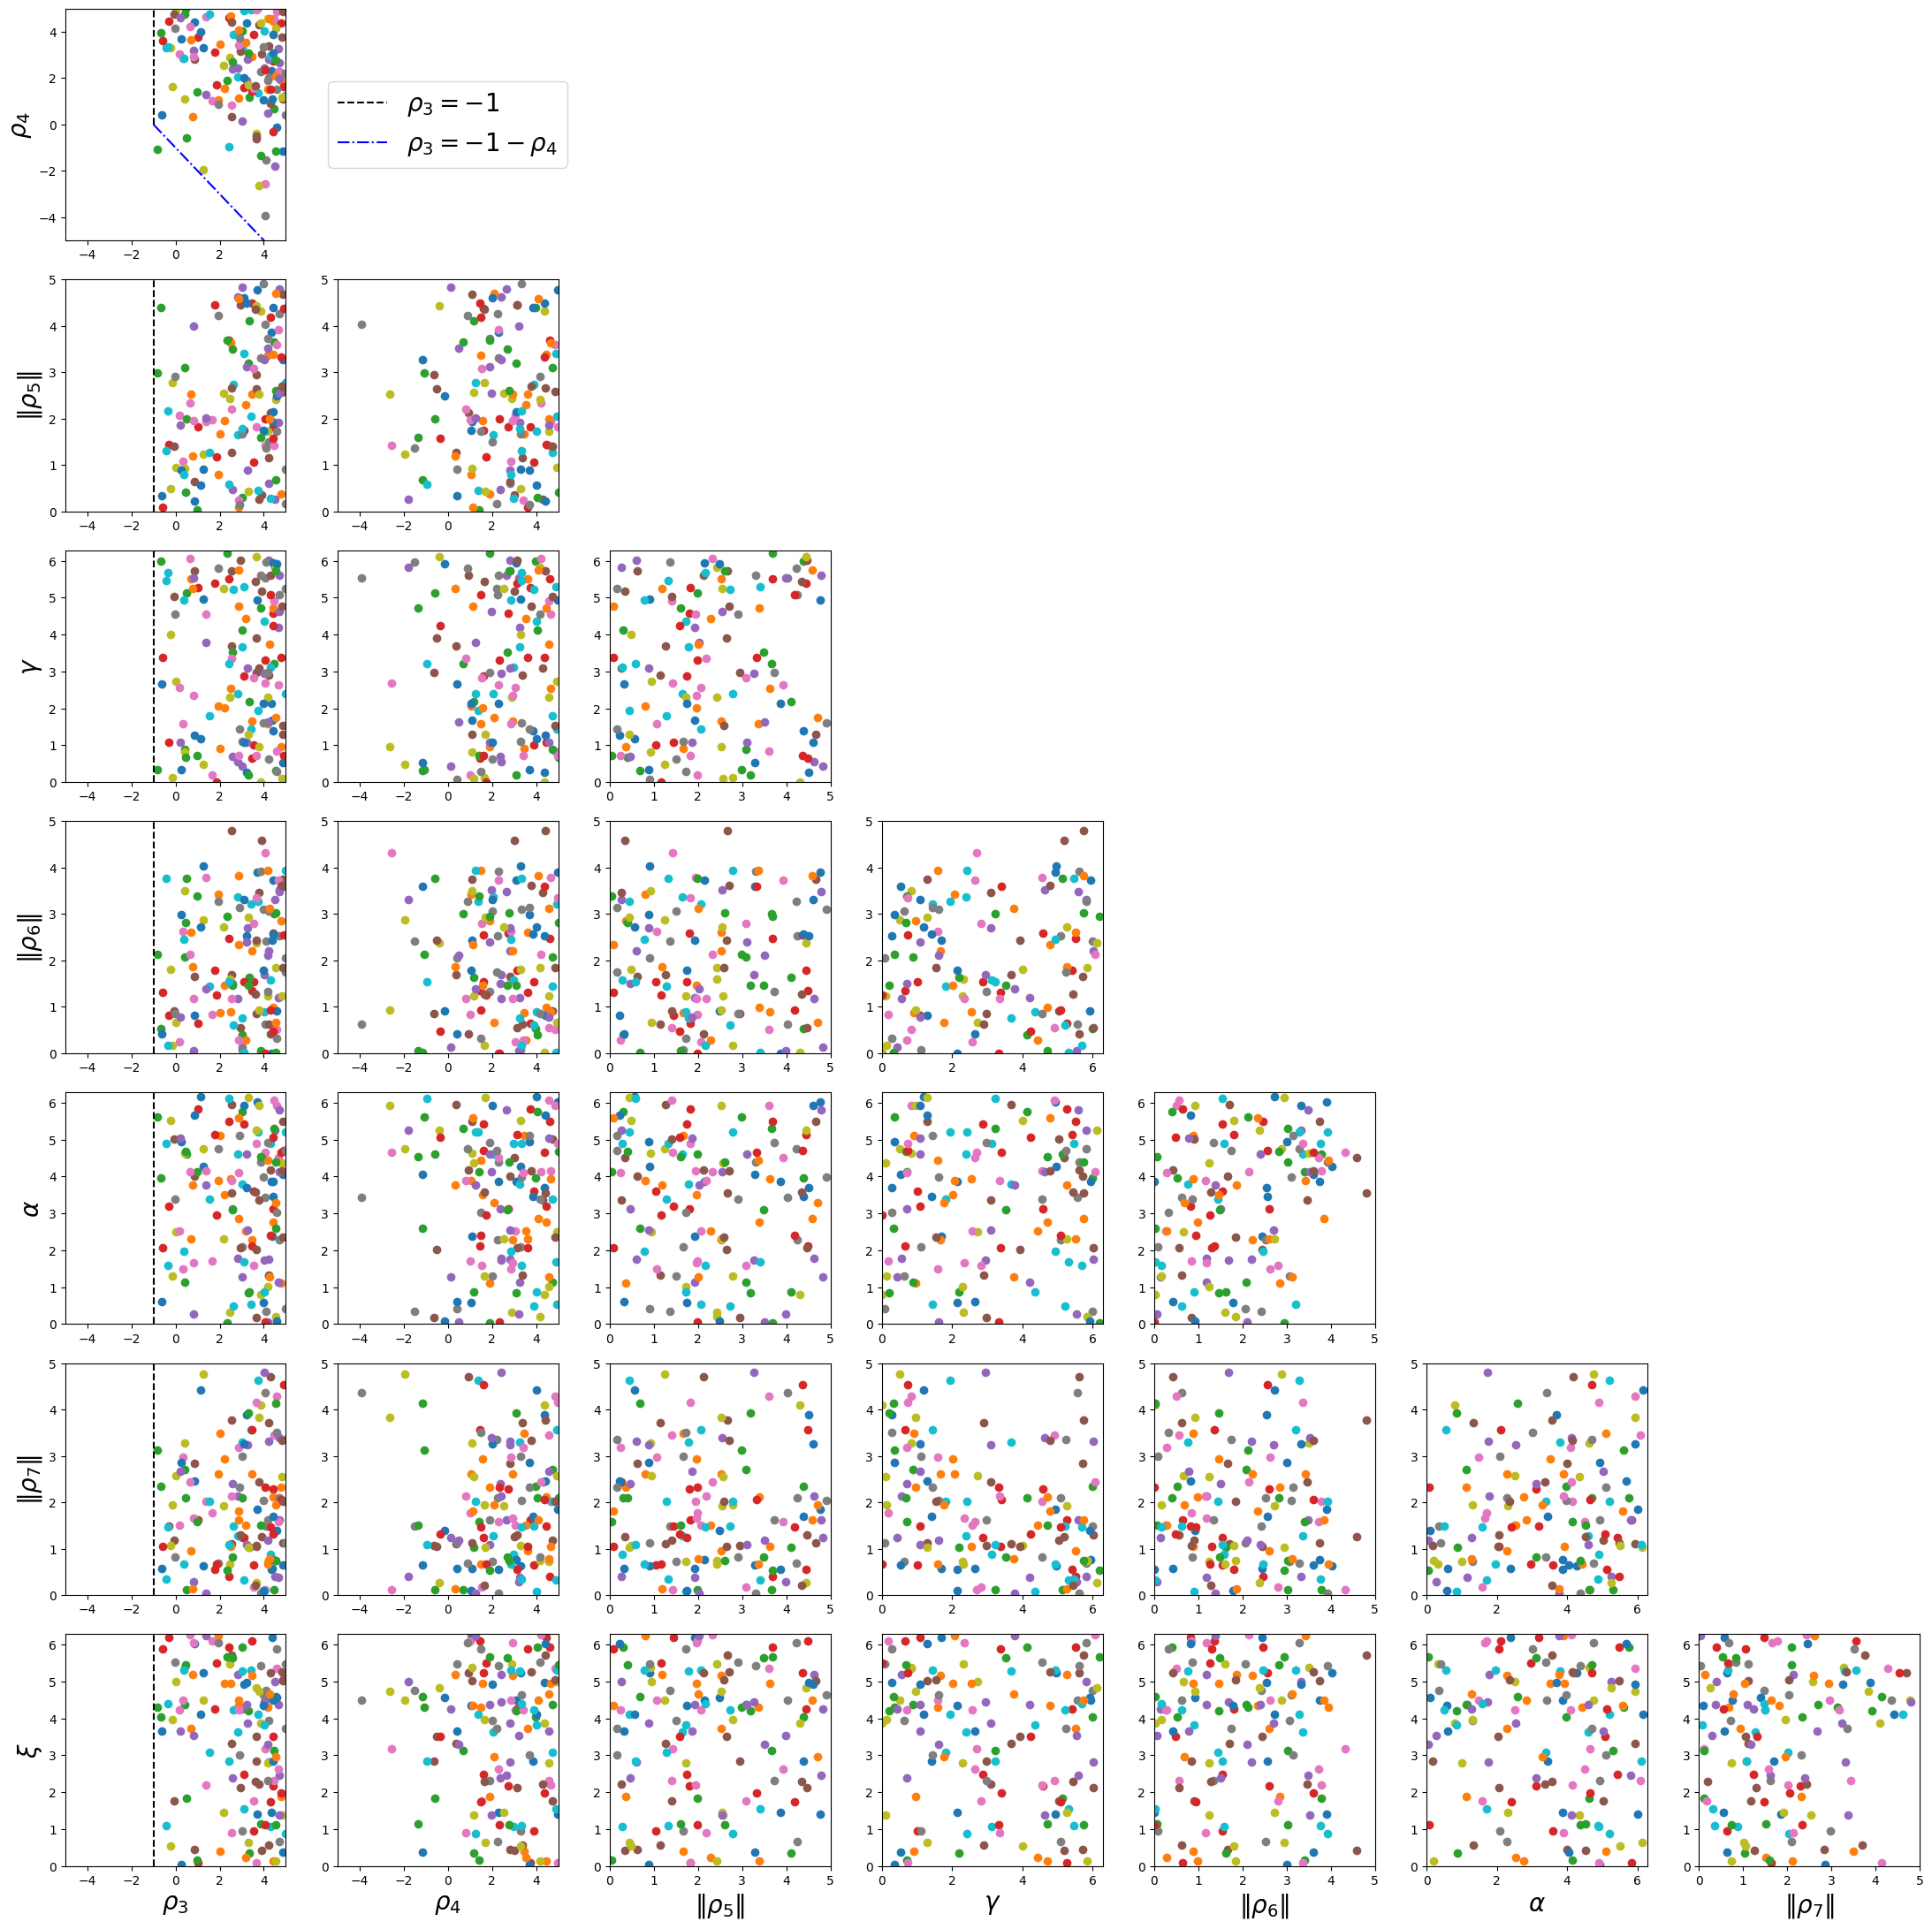

In [63]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][1])

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][2])

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][2])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][3])

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][3])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][3])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][4])

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][4])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][4])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][3], Z2_violating_valid_values[int(point)][4])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][3], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][4], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][6])

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][3], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][4], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][5], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][3], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][4], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][5], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][6], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()

In [64]:
# Explore Z_2-violating 2HDM results with rho_3<-1 (these values are impossible in the 2HDM with Z_2 symmetry)

dim = 100
rho_3 = np.random.default_rng().uniform(-5,-1,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_7 = np.random.default_rng().uniform(0,5,dim) 
xi = np.random.default_rng().uniform(0,2*np.pi,dim)
#
Z2_violating_negative_rho3_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
Z2_violating_negative_rho3_valid_values

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [65]:
# Extend the limits in order to explore Z_2-violating 2HDM results with rho_3<-1

dim = 100
rho_3 = np.random.default_rng().uniform(-5,-1,dim)
rho_4 = np.random.default_rng().uniform(-10,10,dim)
rho_5 = np.random.default_rng().uniform(0,10,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,10,dim) 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_7 = np.random.default_rng().uniform(0,10,dim) 
xi = np.random.default_rng().uniform(0,2*np.pi,dim)
#
Z2_violating_negative_rho3_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
Z2_violating_negative_rho3_valid_values

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


# Symmetric 2HDM potential 

In [66]:
# Explore Symmetric Z_2-violating 2HDM results

dim = 1000
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) #rho_6 = rho_7 and alpha = xi in order to assure rho_eff_6 = rho_eff_7 (alpha and xi can differ by a multiple of 2*pi, but this fact has no impact on the following figures)
alpha = np.random.default_rng().uniform(0,2*np.pi,dim) #rho_6 = rho_7 and alpha = xi in order to assure rho_eff_6 = rho_eff_7 (alpha and xi can differ by a multiple of 2*pi, but this fact has no impact on the following figures)
rho_7 = rho_6
xi = alpha
#
symmetric_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
symmetric_valid_values

[[3.477045001677043,
  -3.617429799669525,
  0.3827063423099081,
  1.0763022017398078,
  0.11468288786600056,
  6.170670412247962,
  0.11468288786600056,
  6.170670412247962,
  0.6054344458630113],
 [4.6607531787547565,
  -4.4907078676785375,
  1.5873045285744525,
  2.3182367335387983,
  3.1660201920895057,
  4.710872954361644,
  3.1660201920895057,
  4.710872954361644,
  0.08341977210069167],
 [1.3265681092084147,
  4.472453315944582,
  0.5901868352725587,
  4.329049437367544,
  1.861607435158843,
  4.841628821338381,
  1.861607435158843,
  4.841628821338381,
  1.9878017611648726],
 [3.7940577596571146,
  -2.9691578141676347,
  0.9962532433929217,
  5.740120008823661,
  2.301612922616549,
  4.92739945382153,
  2.301612922616549,
  4.92739945382153,
  1.6444018460953287],
 [3.0850340455065464,
  -3.935699846004482,
  4.597081808302648,
  5.874576706737152,
  2.713102410072649,
  4.406014268266077,
  2.713102410072649,
  4.406014268266077,
  0.9423078503638171],
 [4.28164450310293,
  1.

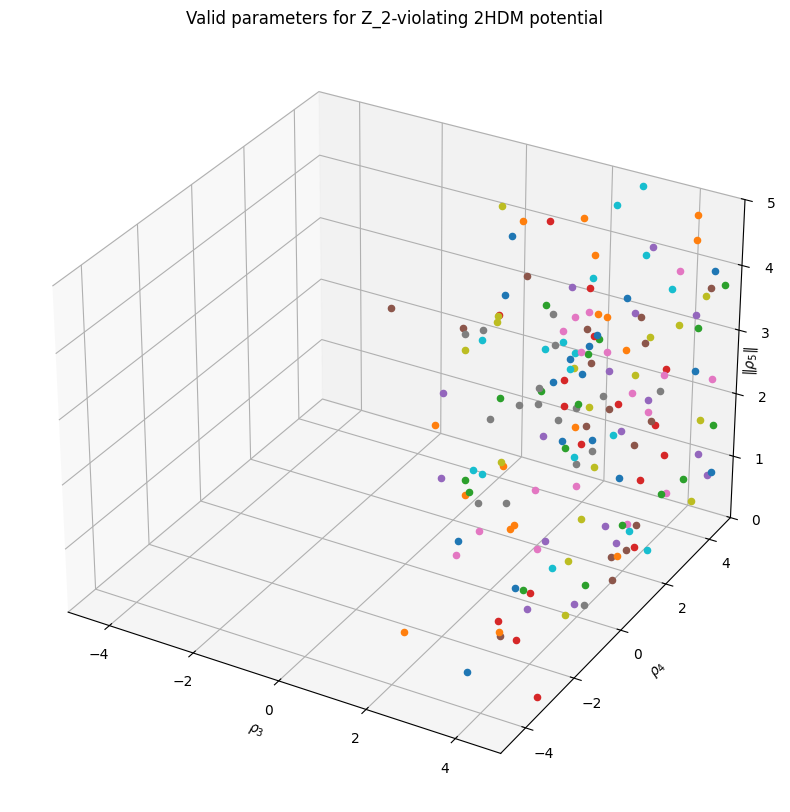

In [67]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(symmetric_valid_values)-1,len(symmetric_valid_values)):
    #
    ax.scatter(symmetric_valid_values[int(point)][0],symmetric_valid_values[int(point)][1],symmetric_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for Z_2-violating 2HDM potential')

plt.show()

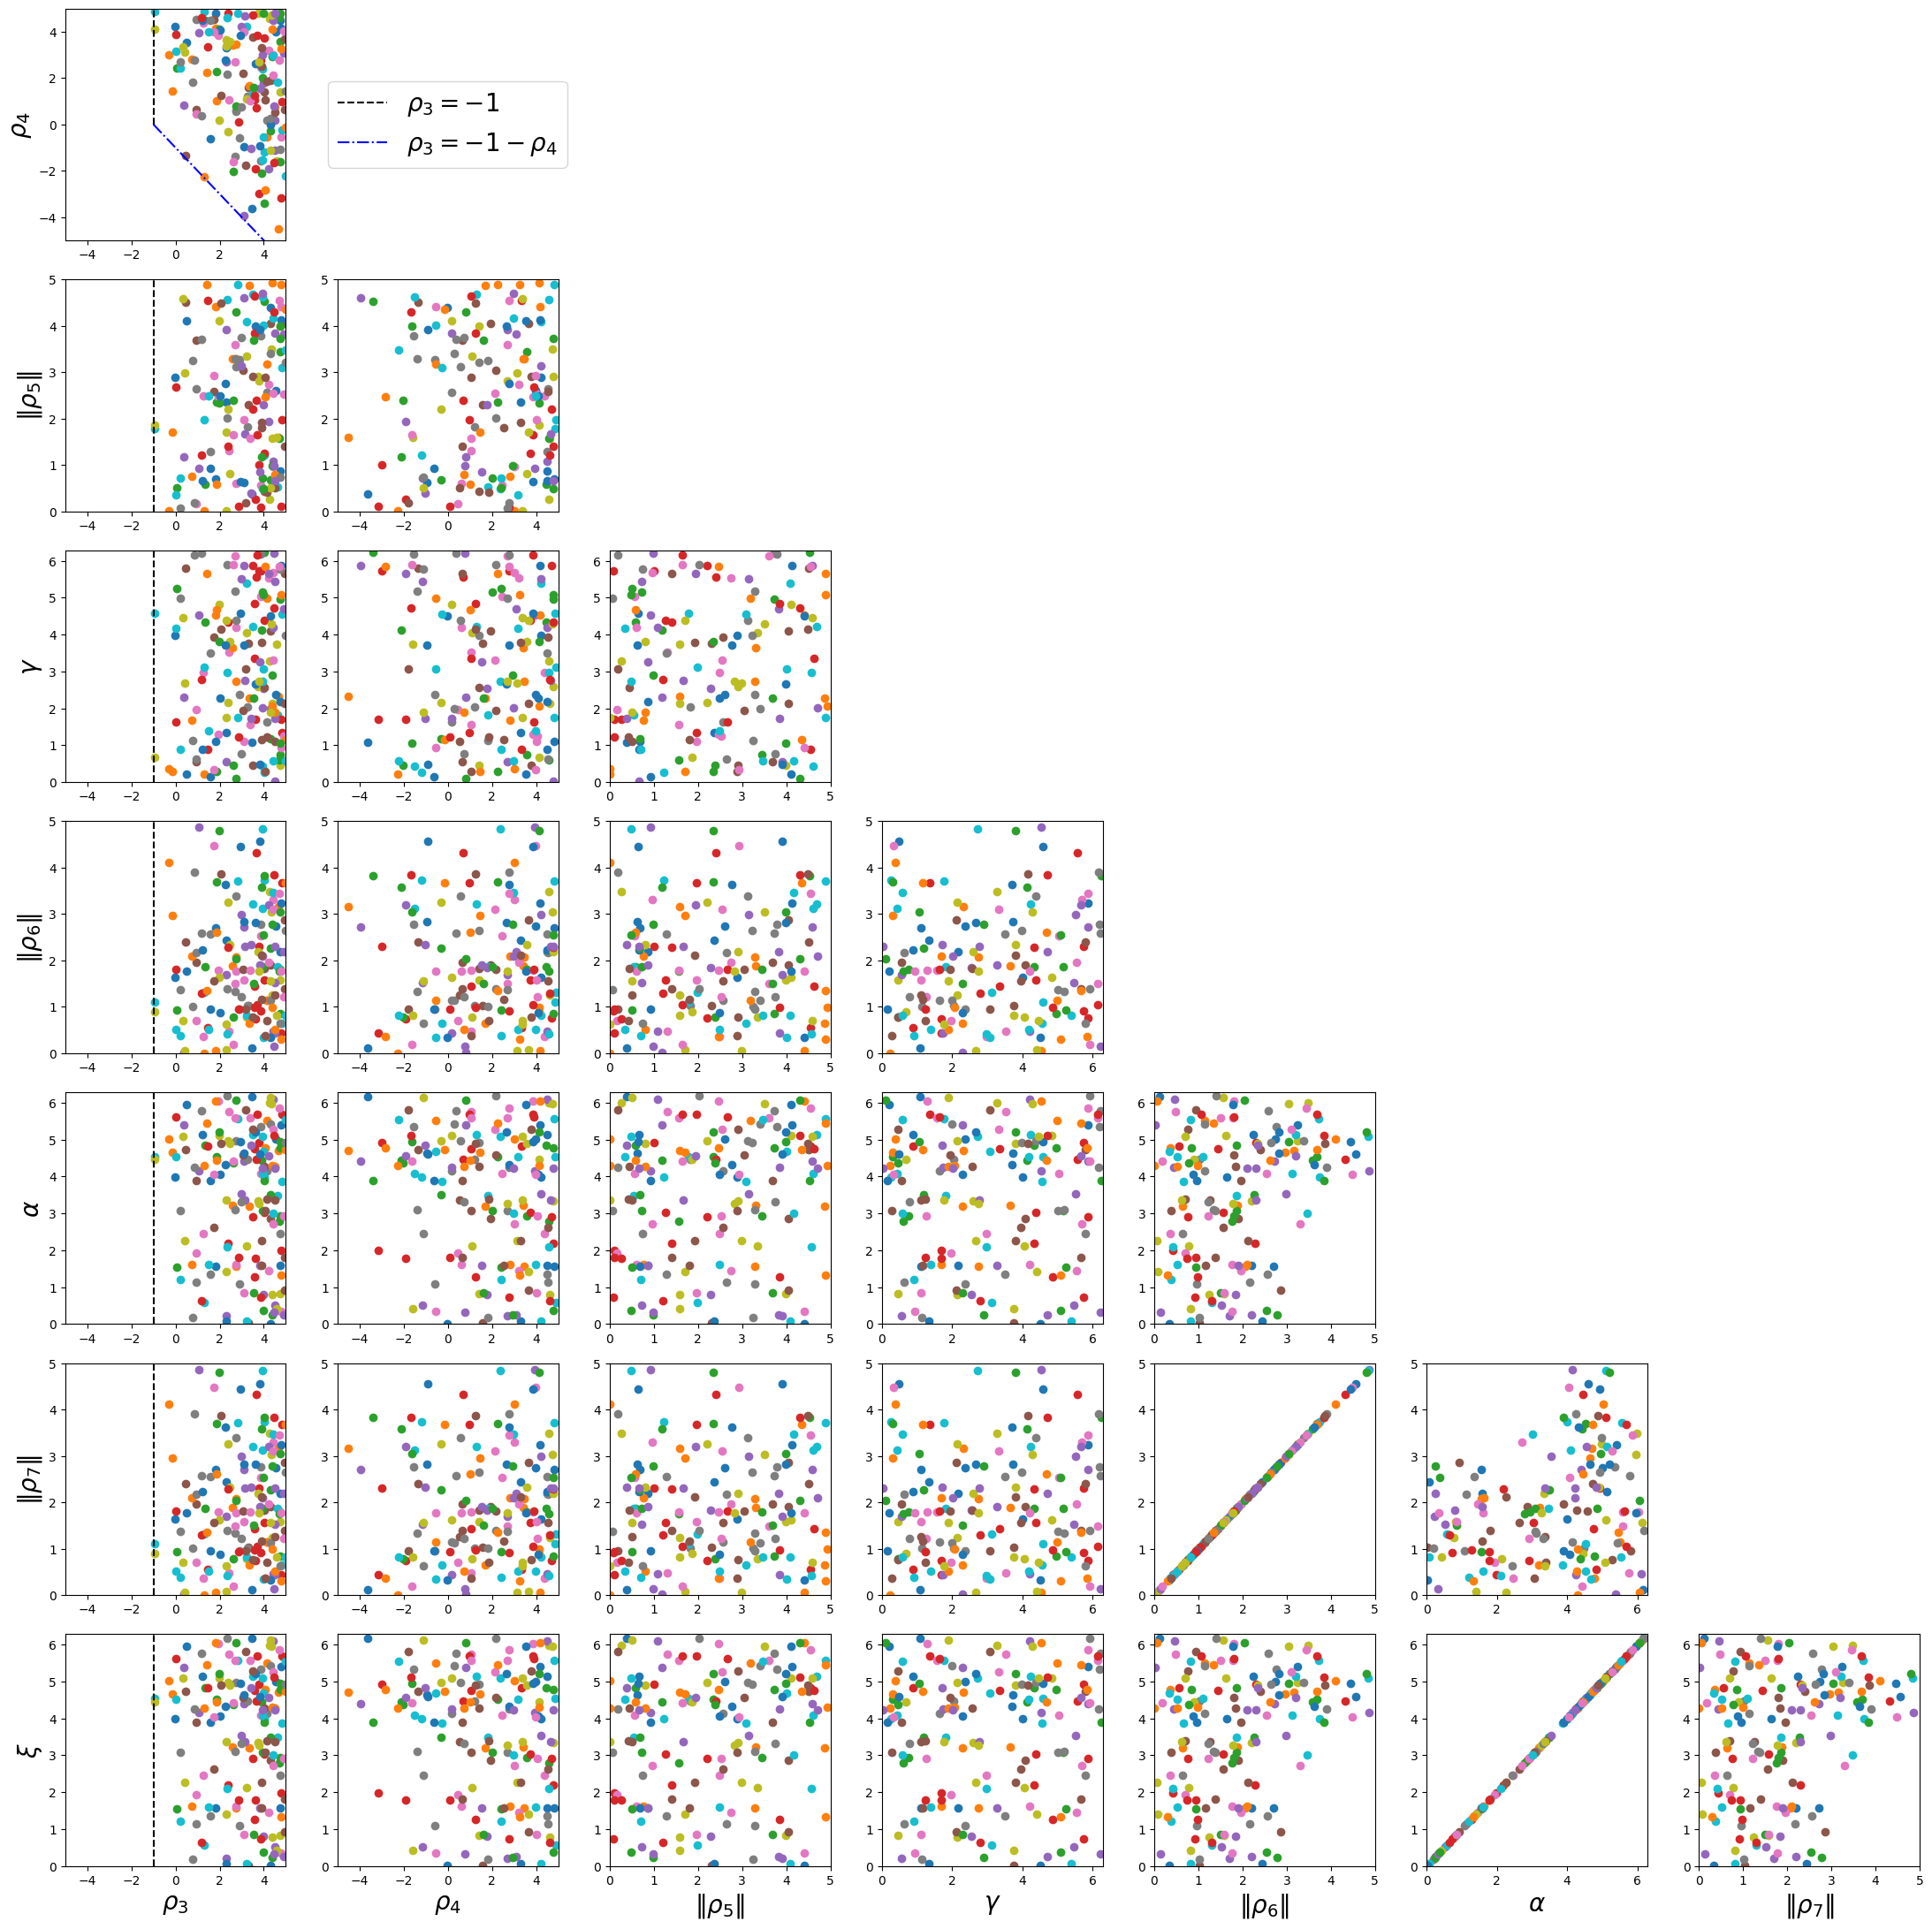

In [68]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][1])

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][2])

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][2])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][3])

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][3])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][3])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][4])

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][4])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][4])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][3], symmetric_valid_values[int(point)][4])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][3], symmetric_valid_values[int(point)][5])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][4], symmetric_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][6])

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][6])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][3], symmetric_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][4], symmetric_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][5], symmetric_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][3], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][4], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][5], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][6], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()

# Antisymmetric 2HDM potential

In [69]:
# Explore Symmetric Z_2-violating 2HDM results

dim = 1000
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) #rho_6 = rho_7 and xi = alpha + pi in order to assure rho_eff_6 + rho_eff_7 = 0 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim) #rho_6 = rho_7 and alpha + pi in order to assure rho_eff_6 + rho_eff_7 = 0 
rho_7 = rho_6
xi = alpha + np.pi
#
antisymmetric_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
antisymmetric_valid_values

[[4.499698966025388,
  -0.02662822495744699,
  1.112945901258281,
  2.8316695511549614,
  0.48149806635804426,
  0.3386097784756212,
  0.48149806635804426,
  3.4802024320654144,
  1.9158869119998445],
 [3.3973976928367104,
  4.414994419572611,
  2.552882968196518,
  5.213175395955342,
  2.2995590463044473,
  3.249134811850959,
  2.2995590463044473,
  6.390727465440753,
  1.2823794875359311],
 [-0.34561819421593754,
  4.136332203598979,
  3.472155429198774,
  3.579923782619851,
  1.0241350033615193,
  3.4607448459482404,
  1.0241350033615193,
  6.6023374995380335,
  0.5888692417113776],
 [4.585234938332926,
  1.545242797179803,
  0.33948297710645114,
  6.105264921166243,
  1.3270712971151095,
  3.0910493323297463,
  1.3270712971151095,
  6.232641985919539,
  1.700756641201555],
 [2.2861562984280335,
  1.5864163189459868,
  0.7868364392733307,
  1.4788056883648493,
  1.6912861543520923,
  0.5705406227961903,
  1.6912861543520923,
  3.7121332763859836,
  1.3292532311924292],
 [1.716102561

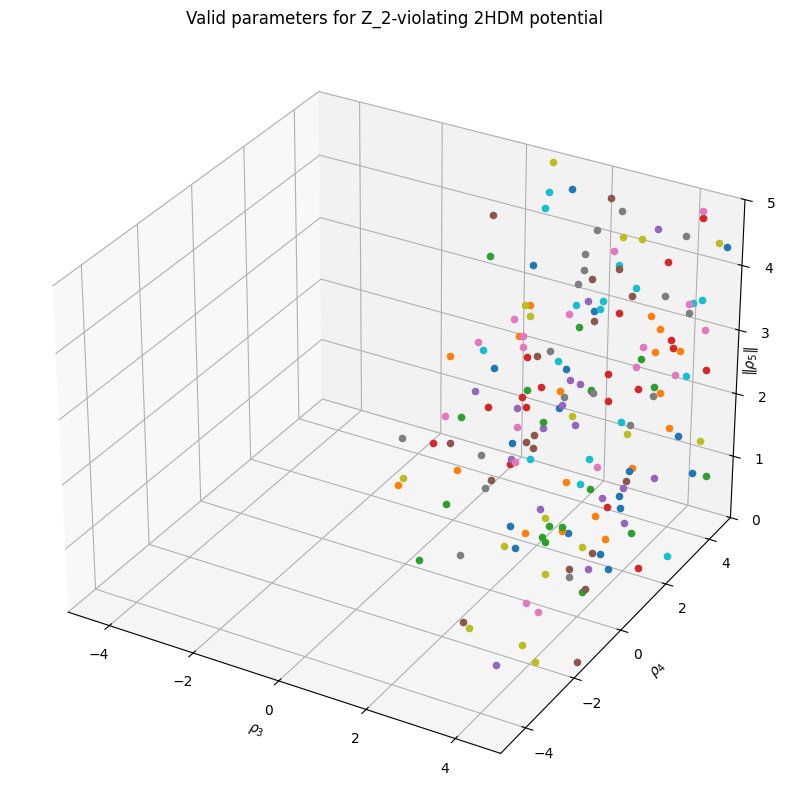

In [70]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(antisymmetric_valid_values)-1,len(antisymmetric_valid_values)):
    #
    ax.scatter(antisymmetric_valid_values[int(point)][0],antisymmetric_valid_values[int(point)][1],antisymmetric_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for Z_2-violating 2HDM potential')

plt.show()

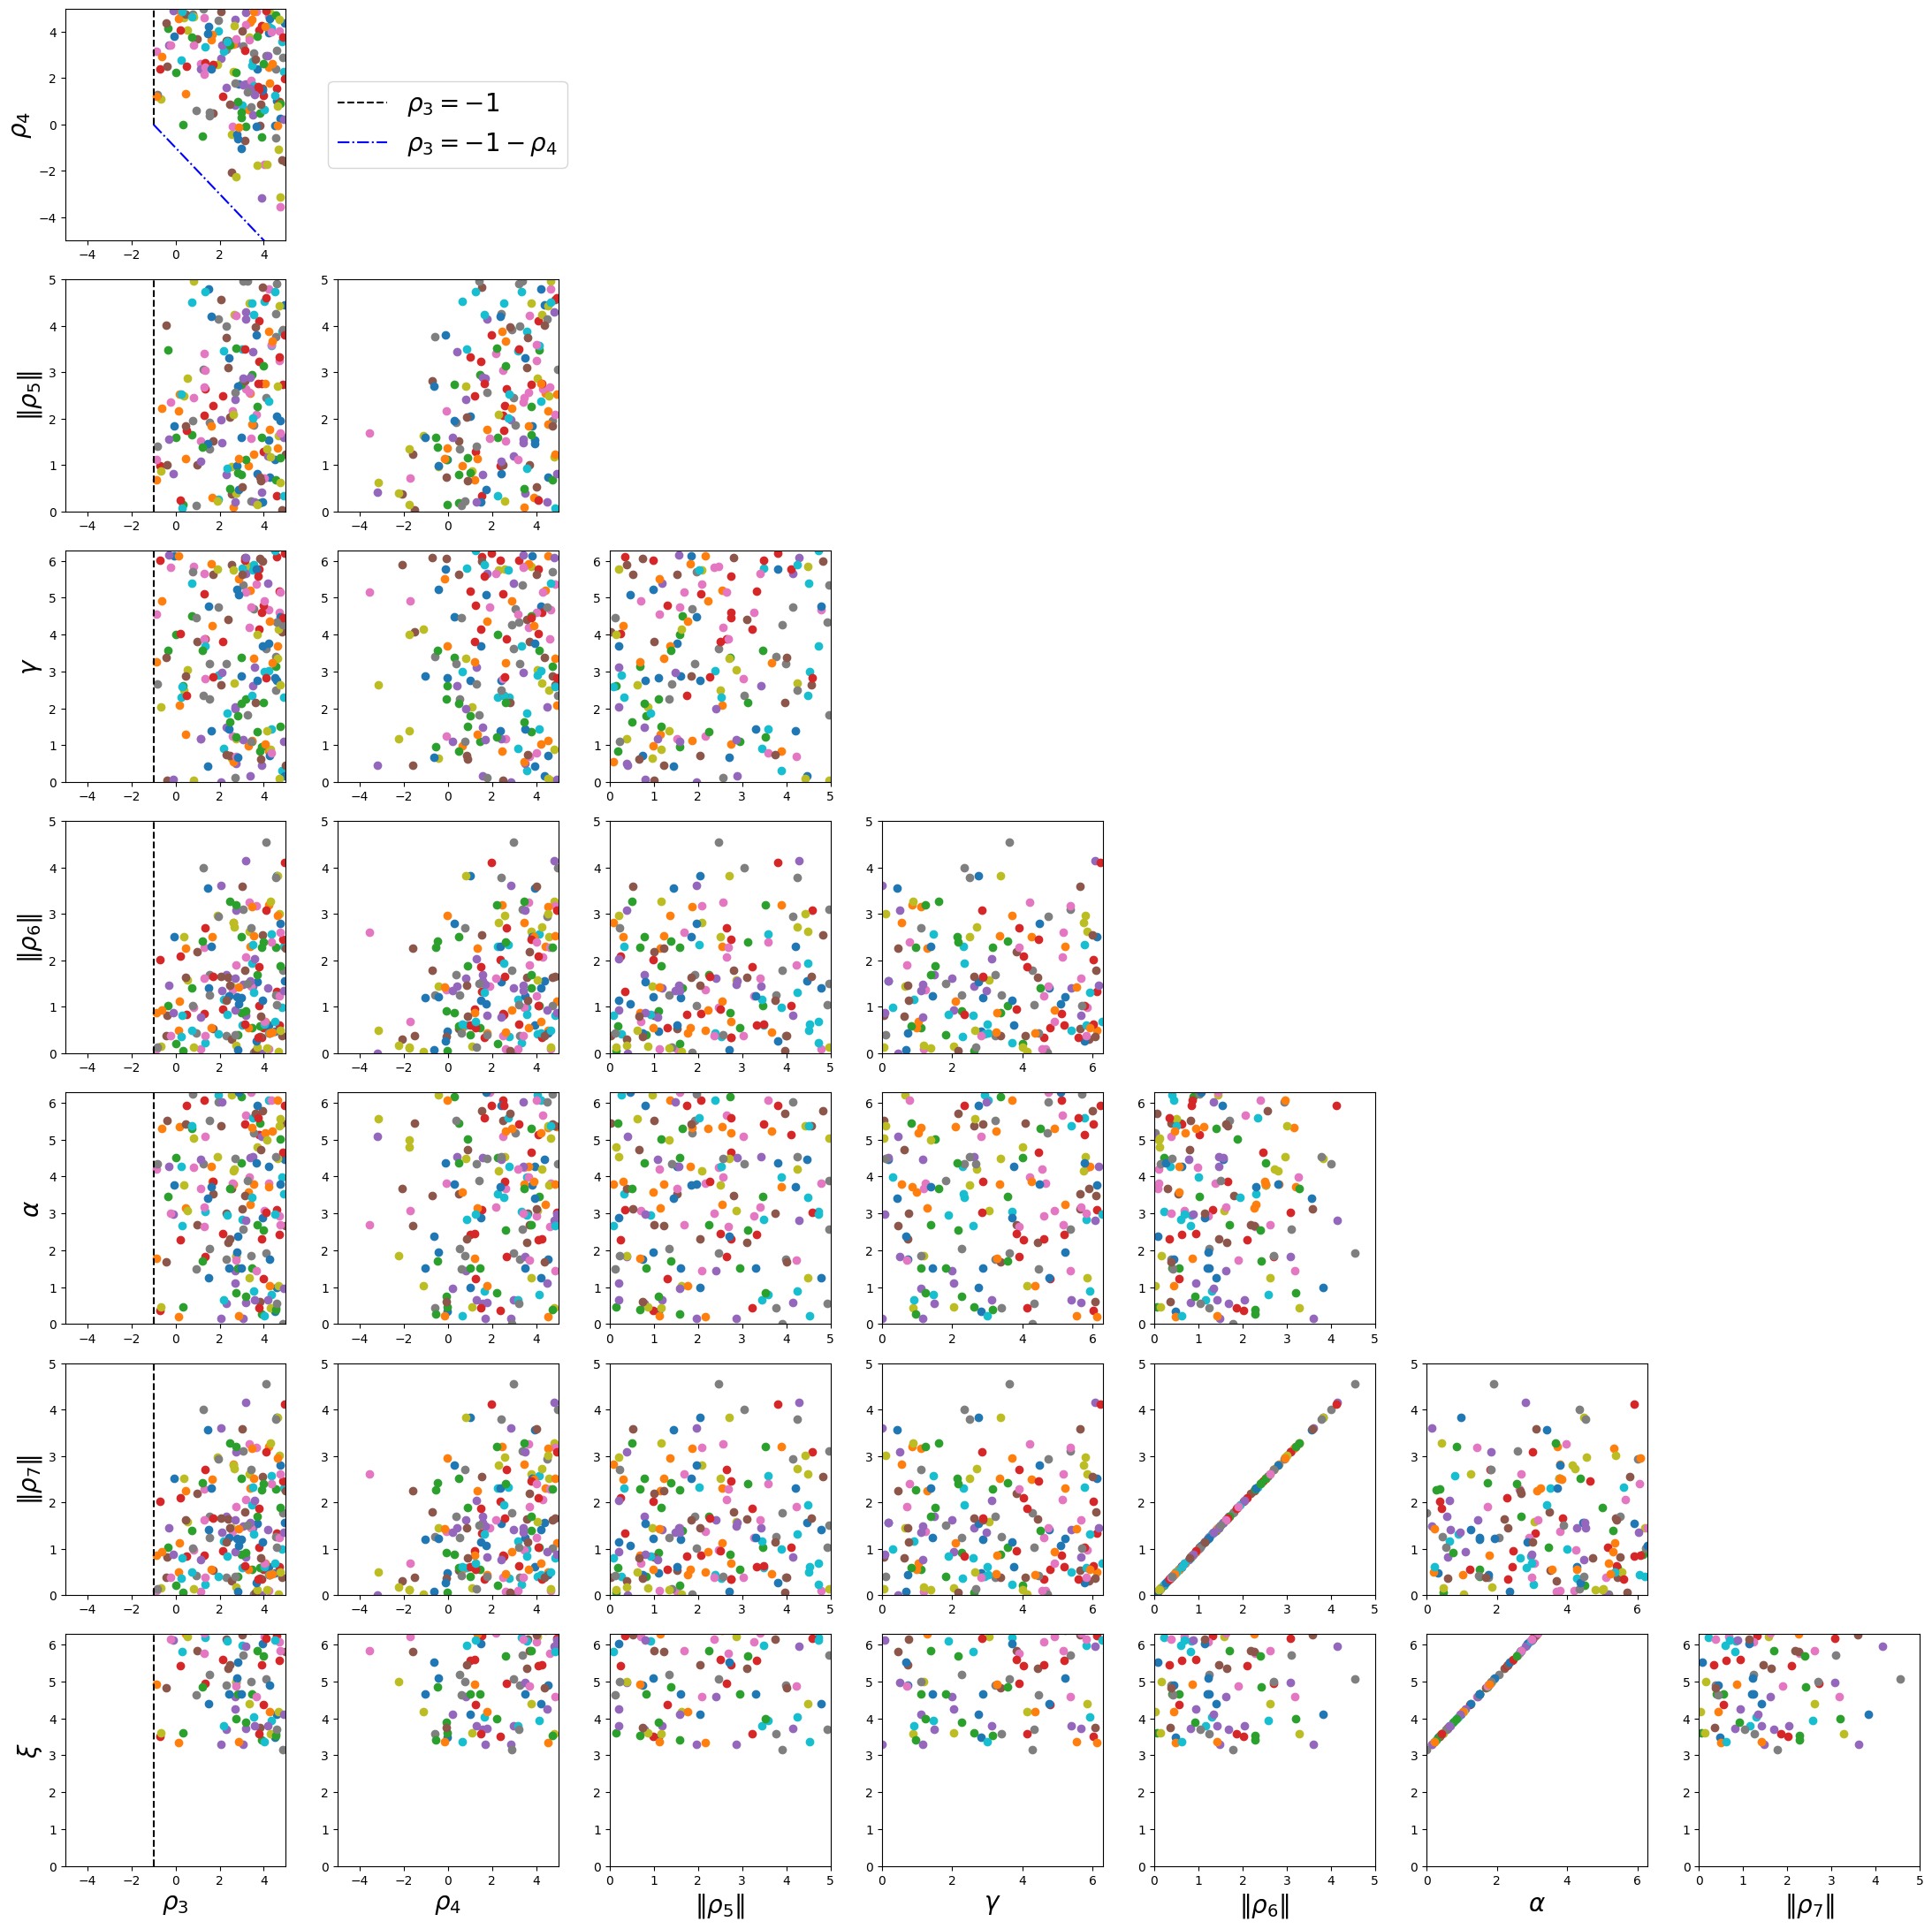

In [71]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][1])

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][2])

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][2])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][3])

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][3])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][3])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][4])

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][4])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][4])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][3], antisymmetric_valid_values[int(point)][4])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][3], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][4], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][6])

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][3], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][4], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][5], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][3], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][4], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][5], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][6], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()